In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import shutil
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

/home/mvpzhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
original_dataset_dir = '/home/mvpzhao/tools/data/extract/kaggle_dogs_cats/train'

base_dir = '/home/mvpzhao/tools/data/extract/cats_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [3]:
fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [7]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [8]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [9]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [10]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [11]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [14]:
from keras import optimizers

In [15]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [16]:
train_gen = ImageDataGenerator(rescale=1./255)
validation_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_gen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6881 - acc: 0.5225 - val_loss: 0.6667 - val_acc: 0.6040
Epoch 2/30
100/100 [==============================] - 4s 42ms/step - loss: 0.6464 - acc: 0.6290 - val_loss: 0.6293 - val_acc: 0.6560
Epoch 3/30
100/100 [==============================] - 4s 42ms/step - loss: 0.6004 - acc: 0.6880 - val_loss: 0.6162 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 4s 42ms/step - loss: 0.5618 - acc: 0.7010 - val_loss: 0.6530 - val_acc: 0.6350
Epoch 5/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5321 - acc: 0.7295 - val_loss: 0.5878 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5109 - acc: 0.7380 - val_loss: 0.5872 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 4s 42ms/step - loss: 0.4864 - acc: 0.7650 - val_loss: 0.5963 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 4s 43ms/step - 

In [18]:
model.save('cats_and_dogs_small_1.h5')

In [19]:
import matplotlib.pyplot as plt

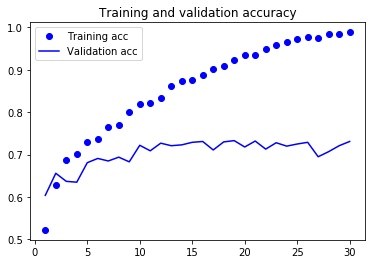

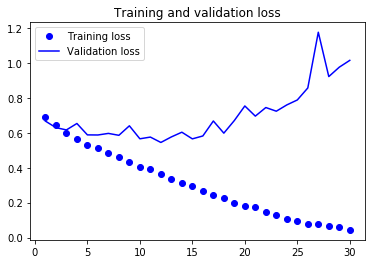

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

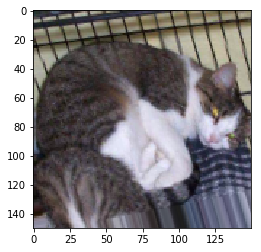

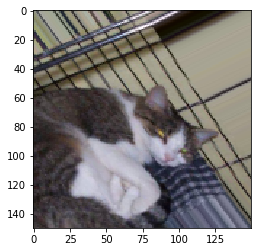

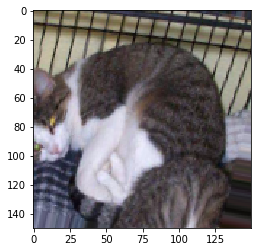

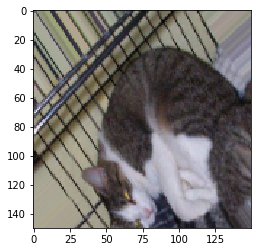

In [22]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6909 - acc: 0.5266 - val_loss: 0.6797 - val_acc: 0.5685
Epoch 2/100
100/100 [==============================] - 13s 132ms/step - loss: 0.6806 - acc: 0.5638 - val_loss: 0.6635 - val_acc: 0.5934
Epoch 3/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6664 - acc: 0.5822 - val_loss: 0.6804 - val_acc: 0.5495
Epoch 4/100
100/100 [==============================] - 13s 132ms/step - loss: 0.6593 - acc: 0.5950 - val_loss: 0.6717 - val_acc: 0.5625
Epoch 5/100
100/100 [==============================] - 13s 134ms/step - loss: 0.6517 - acc: 0.6137 - val_loss: 0.6702 - val_acc: 0.5558
Epoch 6/100
100/100 [==============================] - 13s 135ms/step - loss: 0.6309 - acc: 0.6394 - val_loss: 0.5997 - val_acc: 0.6746
Epoch 7/100
100/100 [==============================] - 13s 133ms/step - loss: 0.6218 - acc: 0.6566 -

100/100 [==============================] - 13s 133ms/step - loss: 0.4018 - acc: 0.8212 - val_loss: 0.4638 - val_acc: 0.7970
Epoch 61/100
100/100 [==============================] - 13s 133ms/step - loss: 0.3889 - acc: 0.8272 - val_loss: 0.4392 - val_acc: 0.8009
Epoch 62/100
100/100 [==============================] - 13s 133ms/step - loss: 0.3884 - acc: 0.8247 - val_loss: 0.4016 - val_acc: 0.8255
Epoch 63/100
100/100 [==============================] - 13s 135ms/step - loss: 0.3873 - acc: 0.8303 - val_loss: 0.4705 - val_acc: 0.7751
Epoch 64/100
100/100 [==============================] - 14s 136ms/step - loss: 0.3878 - acc: 0.8219 - val_loss: 0.4400 - val_acc: 0.8054
Epoch 65/100
100/100 [==============================] - 14s 138ms/step - loss: 0.3882 - acc: 0.8222 - val_loss: 0.5021 - val_acc: 0.7728
Epoch 66/100
100/100 [==============================] - 13s 135ms/step - loss: 0.3878 - acc: 0.8281 - val_loss: 0.4120 - val_acc: 0.8054
Epoch 67/100
100/100 [==============================] 

In [26]:
model.save('cats_and_dogs_small_2.h5')

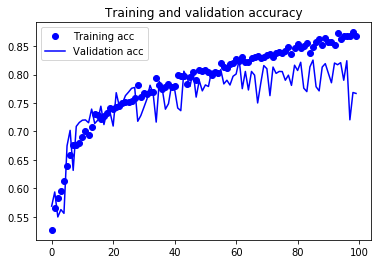

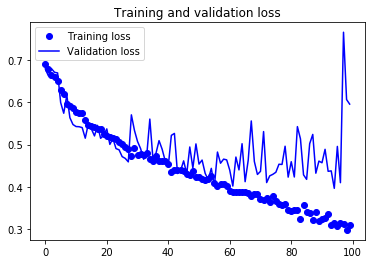

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()